In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import datetime
from datetime import date

In [4]:
df = pd.read_csv("dataset.csv")

In [5]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [6]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [7]:
df.shape

(350, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [9]:
df.drop('Customer ID', axis=1, inplace=True)

In [10]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [11]:
df.describe()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,33.597143,845.381714,12.600000,4.019143,26.588571
std,4.870882,362.058695,4.155984,0.580539,13.440813
min,26.000000,410.800000,7.000000,3.000000,9.000000
25%,30.000000,502.000000,9.000000,3.500000,15.000000
50%,32.500000,775.200000,12.000000,4.100000,23.000000
75%,37.000000,1160.600000,15.000000,4.500000,38.000000
max,43.000000,1520.100000,21.000000,4.900000,63.000000


In [12]:
df.isna().sum()

Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.drop_duplicates(inplace=True)

Analysis Based on GENDER

In [15]:
df['Gender'].value_counts().reset_index()

,index,Gender
0,Female,88
1,Male,80


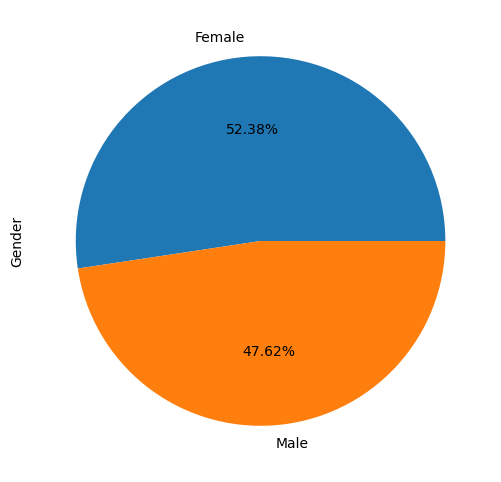

In [16]:
# visualize the Gender column
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

The above pie shows male & female distribution


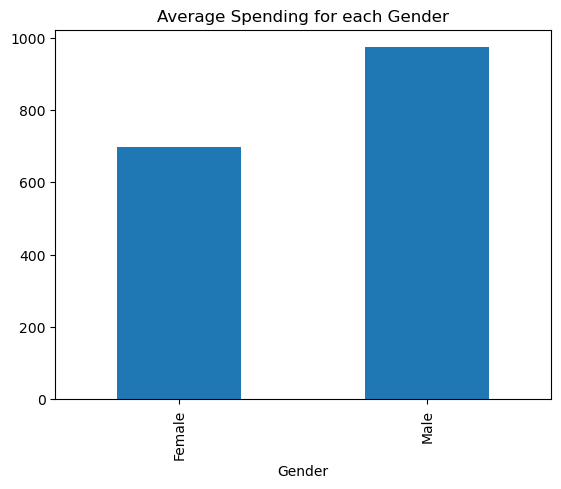

In [17]:
# find the relation between the average spending and gender
gender_spend = df.groupby('Gender')['Total Spend'].mean()
gender_spend.plot.bar()
plt.title("Average Spending for each Gender")
plt.show()

From above bar graph, we understand Male spend more than Female.

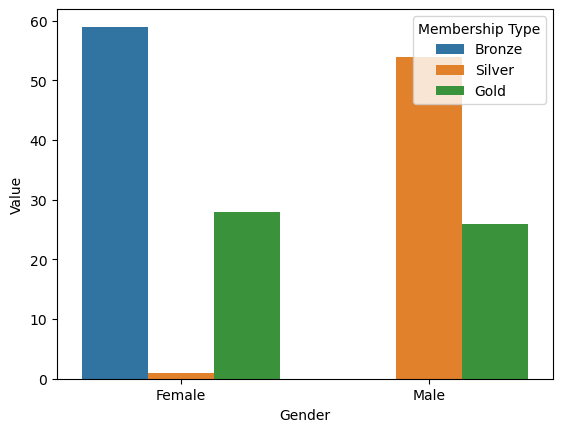

In [18]:
# visualize the gender && membership type
gender_membership = df[['Gender', 'Membership Type']].value_counts().reset_index(name='Value')

sns.barplot(data=gender_membership, x='Gender', y='Value', hue='Membership Type')
plt.show()

Analysis Based on Age & Gender

In [19]:
GenderwithAge = df.groupby('Gender')['Age'].value_counts().reset_index(name='Count')

GenderwithAge

,Gender,Age,Count
0,Female,43,15
1,Female,37,13
2,Female,41,13
3,Female,30,12
4,Female,31,12
5,Female,36,11
6,Female,32,3
7,Female,38,3
8,Female,42,3
9,Female,29,2


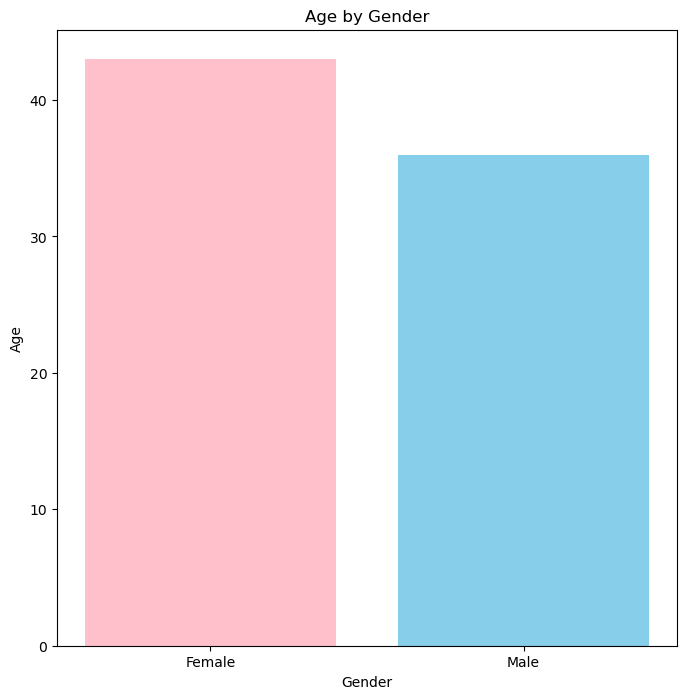

In [20]:
plt.figure(figsize=(8,8))
plt.bar(GenderwithAge['Gender'], GenderwithAge['Age'],
        color=['pink', 'skyblue'],
       )
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age by Gender')
plt.show()

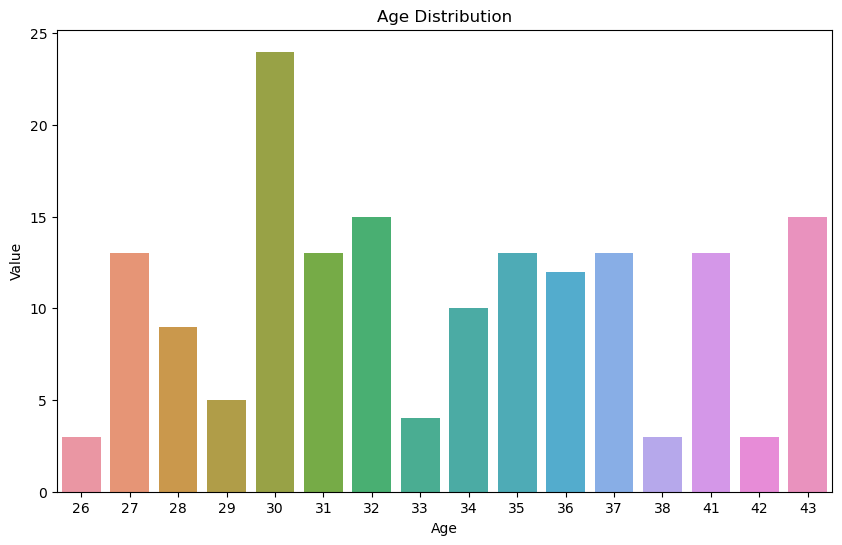

In [21]:
# visualize the age column
age_data = df['Age'].value_counts().reset_index(name='Value')
age_data = age_data.rename(columns={'index': 'Age'})

plt.figure(figsize=(10, 6))
sns.barplot(data=age_data, x='Age', y='Value')
plt.title("Age Distribution")
plt.show()

Most people are Age 30-32

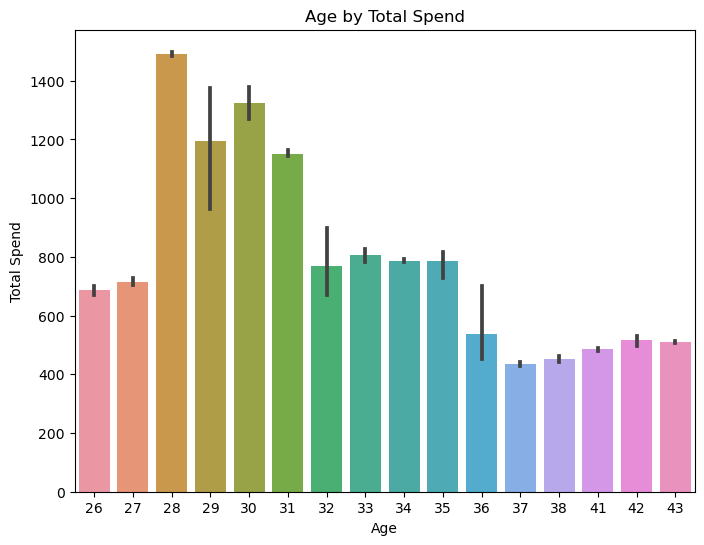

In [22]:
# visualize the Age by city
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Age', y='Total Spend')
plt.title("Age by Total Spend")
plt.show()

In [23]:
df['City'].value_counts().reset_index()

,index,City
0,Chicago,31
1,New York,29
2,Miami,28
3,Houston,28
4,Los Angeles,27
5,San Francisco,25


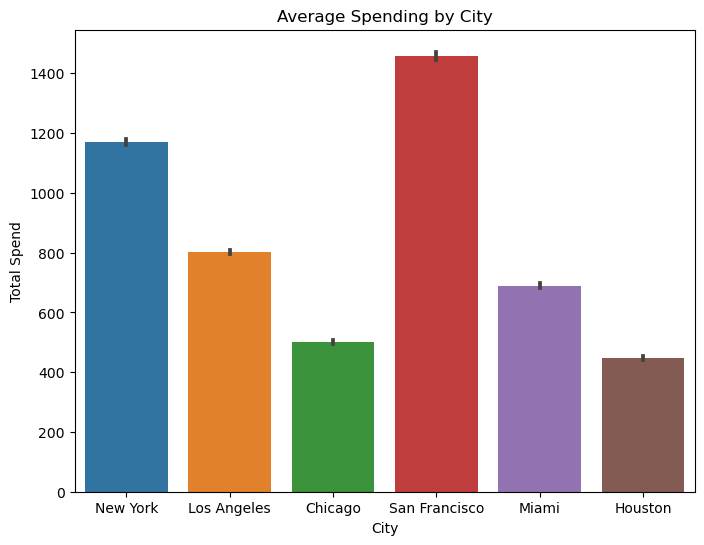

In [24]:
# visualize the average spending by city
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='City', y='Total Spend')
plt.title("Average Spending by City")
plt.show()

In [25]:
df['Membership Type'].value_counts().reset_index()

,index,Membership Type
0,Bronze,59
1,Silver,55
2,Gold,54


In [26]:
# Counting the satisfaction level
df['Satisfaction Level'].value_counts()

Unsatisfied    59
Satisfied      56
Neutral        53
Name: Satisfaction Level, dtype: int64

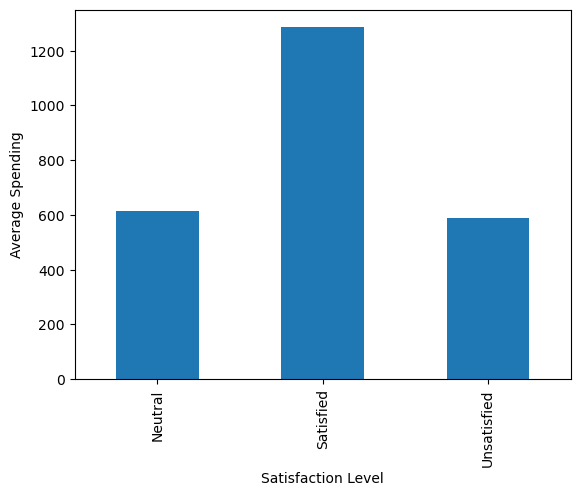

In [27]:
# find the relation between Satistaction Level and average spend
satisfaction_spend = df.groupby('Satisfaction Level')['Total Spend'].mean()
satisfaction_spend.plot.bar()
plt.ylabel('Average Spending')
plt.show()

In [28]:
# making a new column for age group
age_grp=['21-30','31-43']
df['age_group'] = pd.cut(df.Age,bins=np.arange(15,46,15),labels=age_grp,right=True)
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,age_group
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,21-30
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,31-43
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,31-43
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,21-30
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,21-30


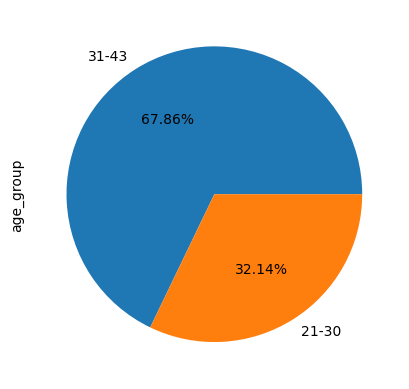

In [29]:
# visualize the distribution of age groups
df['age_group'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

More people in 31-43 age group

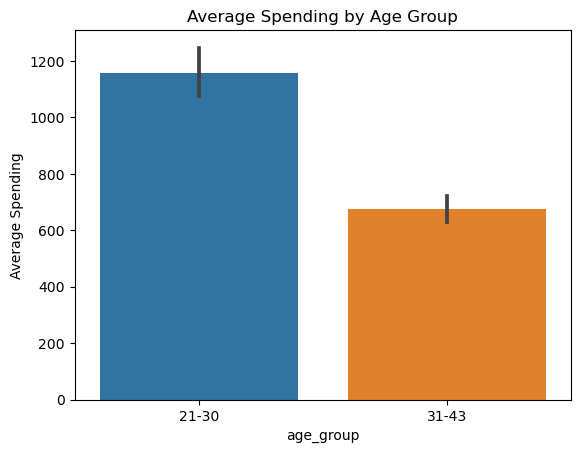

In [30]:
# average spending by age group
sns.barplot(data=df, x='age_group', y='Total Spend')
plt.ylabel('Average Spending')
plt.title('Average Spending by Age Group')
plt.show()

Younger people spend more

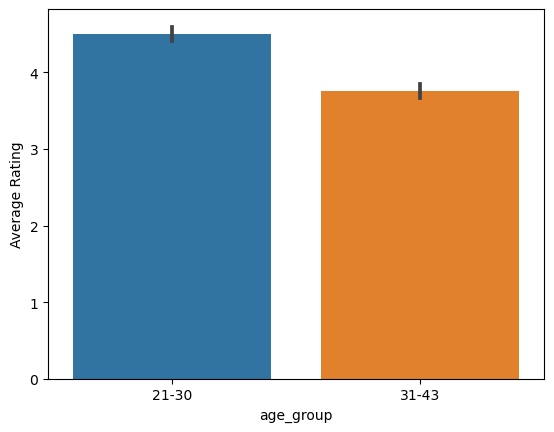

In [31]:
# average Rating by Age Group
sns.barplot(data=df, x='age_group', y='Average Rating')
plt.show()

<Axes: xlabel='age_group,Discount Applied'>

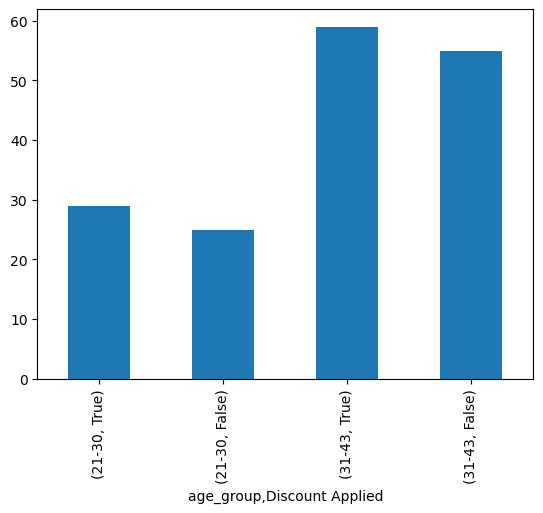

In [32]:
# visualize the relation between the age group and discount applied
age_group_discount = df.groupby('age_group')['Discount Applied'].value_counts()
age_group_discount.plot.bar()

In [33]:
df['Total Spend'].describe()

count     168.000000
mean      829.302679
std       357.458638
min       410.800000
25%       499.375000
50%       710.400000
75%      1160.600000
max      1520.100000
Name: Total Spend, dtype: float64

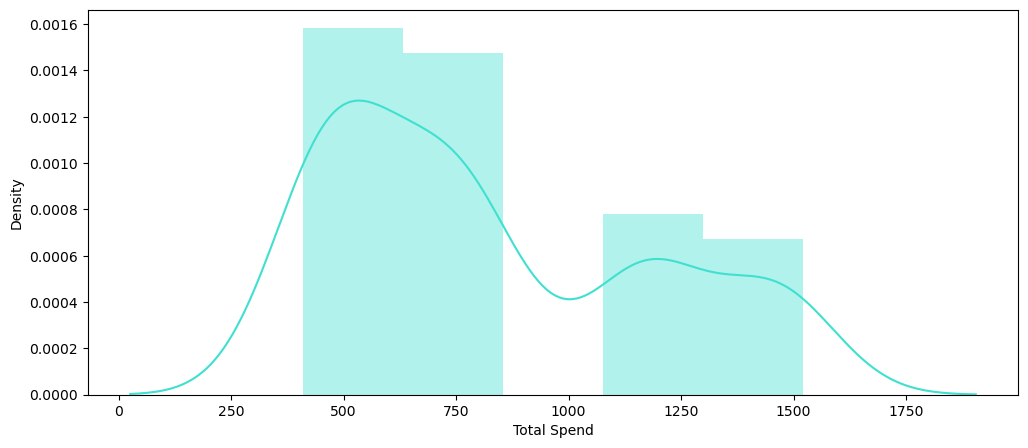

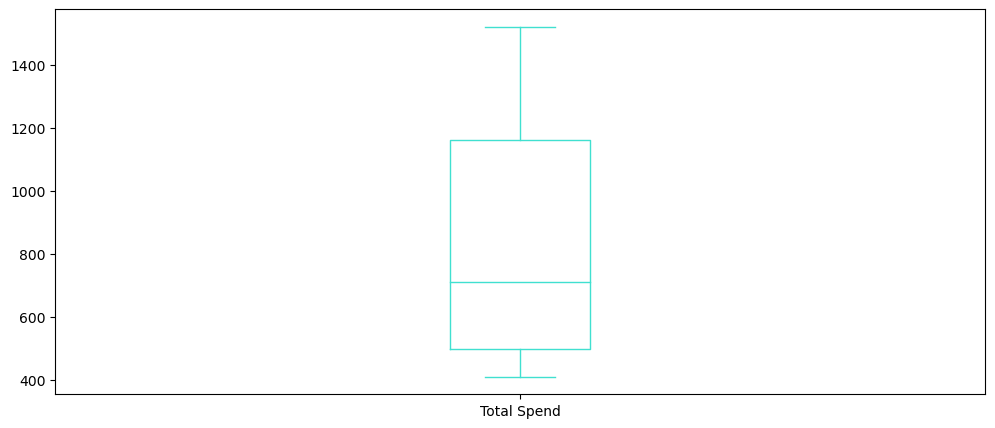

In [34]:
plt.figure(figsize=(12,5))
sns.distplot(df["Total Spend"],color = 'turquoise')
plt.show()
df["Total Spend"].plot.box(figsize=(12,5),color = 'turquoise')
plt.show()

People spend around $800

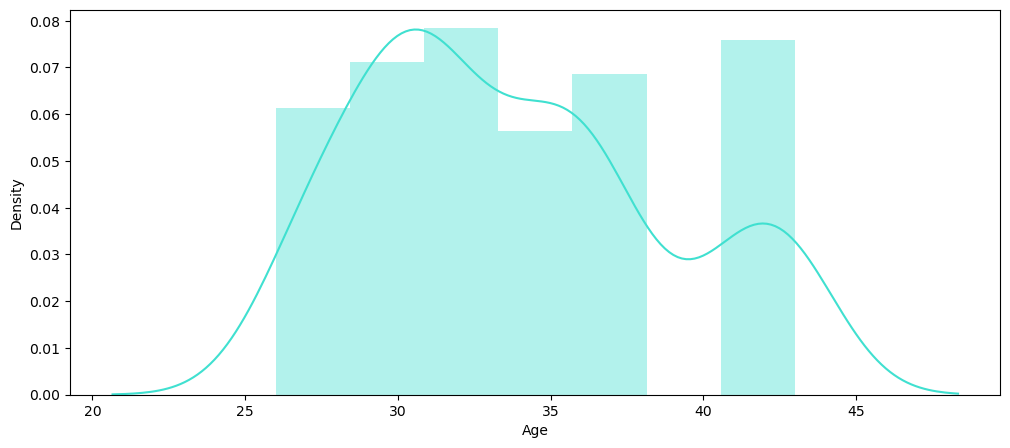

In [35]:
plt.figure(figsize=(12,5))
sns.distplot(df["Age"],color = 'turquoise')
plt.show()

In [36]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['City'] = label_encoder.fit_transform(df['City'])
df['Membership Type'] = label_encoder.fit_transform(df['Membership Type'])
df['Satisfaction Level'] = label_encoder.fit_transform(df['Satisfaction Level'])
df['age_group'] = label_encoder.fit_transform(df['age_group'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    168 non-null    int32  
 1   Age                       168 non-null    int64  
 2   City                      168 non-null    int32  
 3   Membership Type           168 non-null    int32  
 4   Total Spend               168 non-null    float64
 5   Items Purchased           168 non-null    int64  
 6   Average Rating            168 non-null    float64
 7   Discount Applied          168 non-null    bool   
 8   Days Since Last Purchase  168 non-null    int64  
 9   Satisfaction Level        168 non-null    int32  
 10  age_group                 168 non-null    int32  
dtypes: bool(1), float64(2), int32(5), int64(3)
memory usage: 11.3 KB


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_scale = ['Total Spend', 'Average Rating', 'Items Purchased',
       'Discount Applied', 'Days Since Last Purchase', 'age_group']

df[col_scale] = scaler.fit_transform(df[col_scale])

After this transformation, each feature in the specified columns will have a mean of approximately 0 and a standard deviation of 1. Standardization assumes that your data is normally distributed (or approximately normally distributed) within each feature. If your data is not normally distributed, you might consider other scaling techniques like min-max scaling (MinMaxScaler) or robust scaling (RobustScaler), depending on the characteristics of your data. Additionally, scaling should be done on the training data only to prevent data leakage from the test set during model evaluation.

In [39]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,age_group
0,0,29,4,1,0.816226,0.392770,1.053373,0.953463,-0.262687,1,-1.452966
1,1,34,2,2,-0.136935,-0.348638,0.179895,-1.048809,-0.770778,0,0.688247
2,0,43,0,0,-0.893824,-0.842911,-1.042974,0.953463,0.971249,2,0.688247
3,1,30,5,1,1.826627,1.628450,1.228068,-1.048809,-1.206284,1,-1.452966
4,1,27,3,2,-0.305569,0.145634,0.005199,0.953463,1.914847,2,-1.452966


# Model Building

# K-Means

In [40]:
X_0 = df.copy()

In [41]:
from sklearn.cluster import KMeans

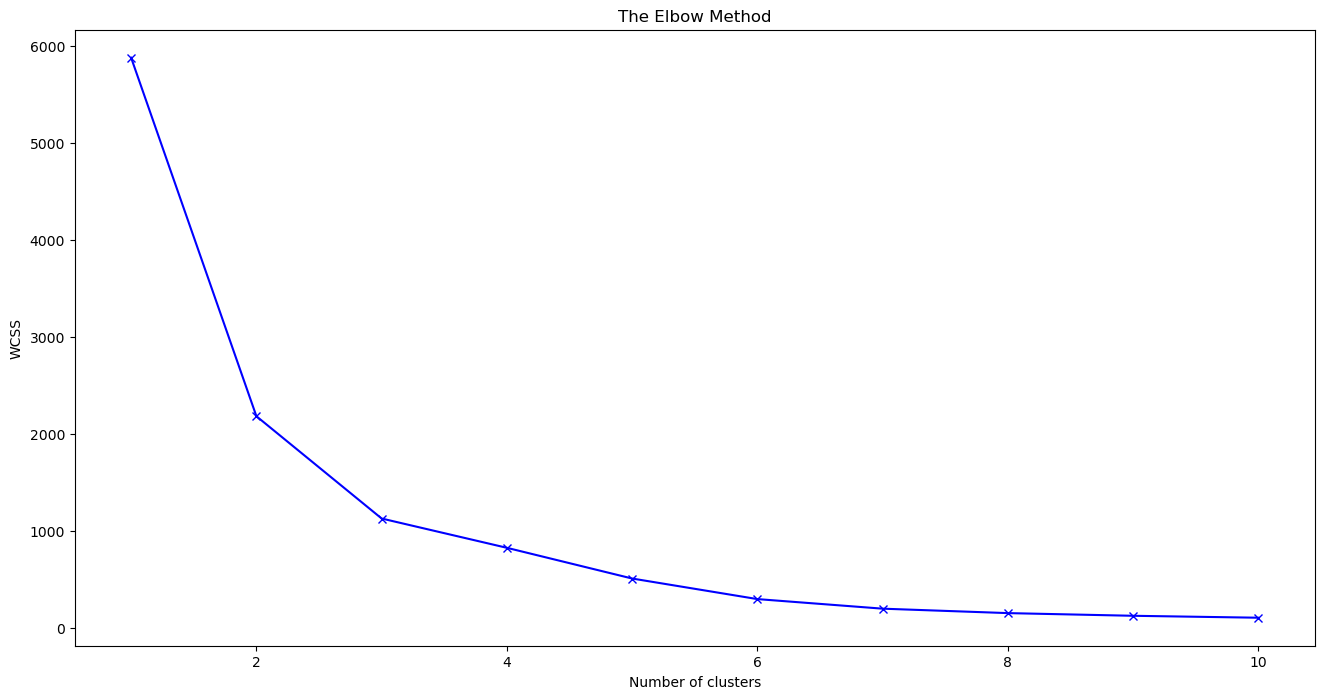

In [42]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_0)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can understand from the plot that cluster = 2 is the best... 

In [43]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=2, random_state=42).fit(X_0)
pred=kmeans.predict(X_0)


# Appending those cluster value into main dataframe (without standard-scalar)

X_0['cluster_Kmeans'] = pred + 1

In [44]:
X_0.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,age_group,cluster_Kmeans
0,0,29,4,1,0.816226,0.392770,1.053373,0.953463,-0.262687,1,-1.452966,2
1,1,34,2,2,-0.136935,-0.348638,0.179895,-1.048809,-0.770778,0,0.688247,2
2,0,43,0,0,-0.893824,-0.842911,-1.042974,0.953463,0.971249,2,0.688247,1
3,1,30,5,1,1.826627,1.628450,1.228068,-1.048809,-1.206284,1,-1.452966,2
4,1,27,3,2,-0.305569,0.145634,0.005199,0.953463,1.914847,2,-1.452966,2


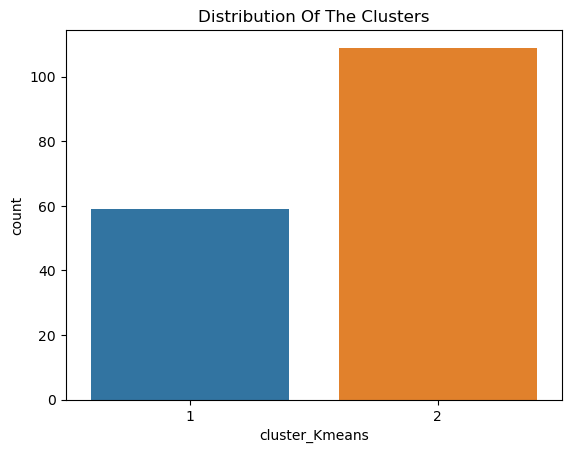

In [45]:
sns.countplot(x=X_0["cluster_Kmeans"])
plt.title("Distribution Of The Clusters")
plt.show()

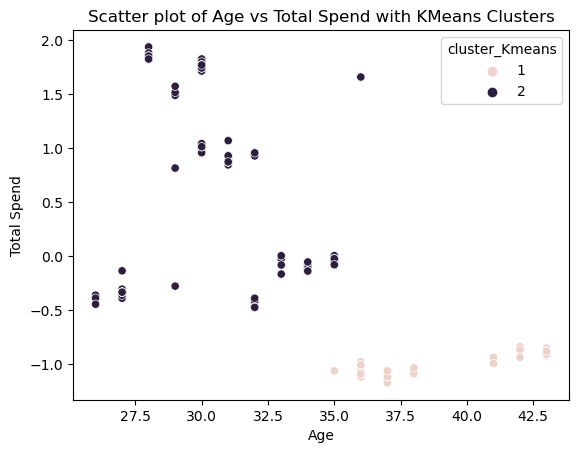

In [46]:
sns.scatterplot(x='Age', y='Total Spend', hue='cluster_Kmeans', data=X_0)
plt.title('Scatter plot of Age vs Total Spend with KMeans Clusters')
plt.show()

In [47]:
#Cluster 2 customers spend more.

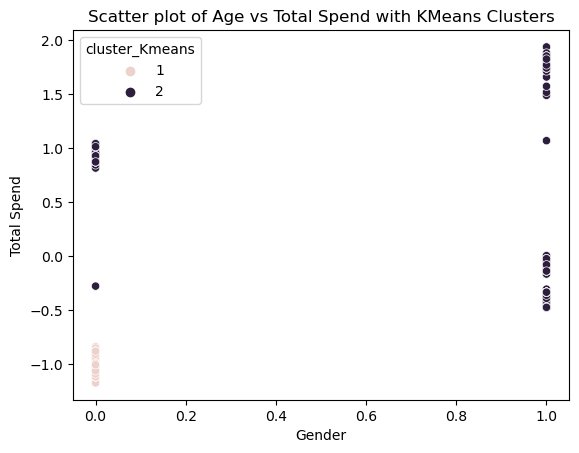

In [48]:
sns.scatterplot(x='Gender', y='Total Spend', hue='cluster_Kmeans', data=X_0)
plt.title('Scatter plot of Age vs Total Spend with KMeans Clusters')
plt.show()

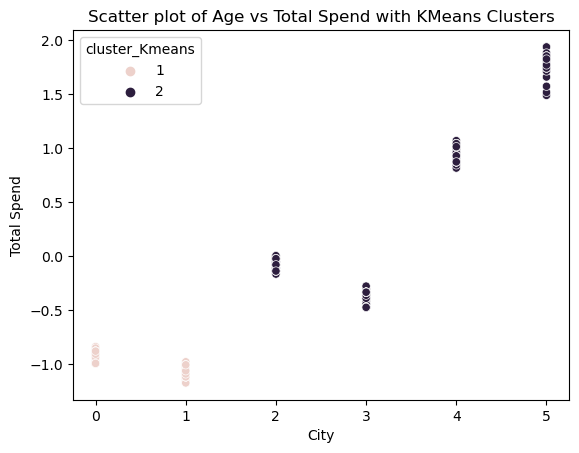

In [49]:
sns.scatterplot(x='City', y='Total Spend', hue='cluster_Kmeans', data=X_0)
plt.title('Scatter plot of Age vs Total Spend with KMeans Clusters')
plt.show()

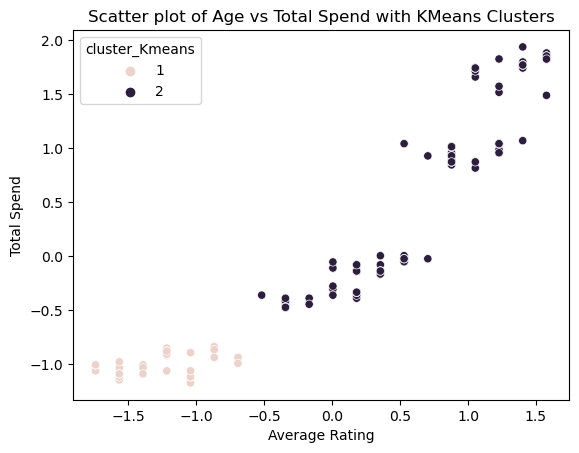

In [50]:
sns.scatterplot(x='Average Rating', y='Total Spend', hue='cluster_Kmeans', data=X_0)
plt.title('Scatter plot of Age vs Total Spend with KMeans Clusters')
plt.show()

Send product rating or feedback email to cluster 2 customer

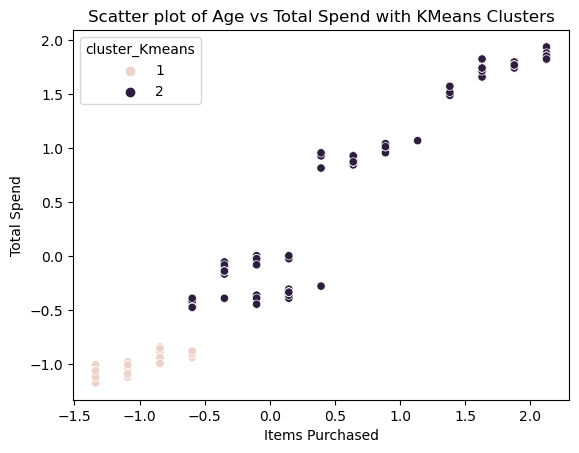

In [51]:
sns.scatterplot(x='Items Purchased', y='Total Spend', hue='cluster_Kmeans', data=X_0)
plt.title('Scatter plot of Age vs Total Spend with KMeans Clusters')
plt.show()

# Conclusion